# Project: Write a data science blog

## Business Understanding
On-time performance is a crucial Key Performance Indicator (KPI) for every airline, representing the percentage of flights that depart on schedule. Maintaining a high on-time rate not only helps airlines minimize costs associated with delays and operational disruptions but also significantly boosts customer satisfaction.

From customer point of view, when is the best time for them to book a flight. We will discover the mystery through following questions:

Question 1: What are the on-time performance trends by month?

Question 2: How does on-time performance vary by the day of the month?

Question 3: What are the trends in on-time performance by the day of the week?

Question 4: How does on-time performance change by the hour of the day?


# Data Understanding

In [49]:
#Import libraries to be used in this analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### GATHER
Importing the data downloaded from Kaggle

In [42]:
flight_df = pd.read_csv('flights.csv')

### Data Exploration

In [37]:
# Check columns and data types
flight_df.dtypes

id                  int64
year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
name               object
dtype: object

In [5]:
#Preview data
flight_df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [6]:
# descriptive overview
flight_df.describe()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168387.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,0.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84193.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168387.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252581.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336775.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


The describe function only gives us the description for numberic columns. For object columns, eg, origin, we will create a function to check their counts and view distinct their values.
Also, we will create function to check null/empty strings in some important columns, eg dep_time, arr_time...

In [46]:
#check value of object columns
def check_count(df, column_name):
    '''
    return count values of object column
    
    input: 
            df: dataframe to be checked
            column_name: column to be checked
    output:
            check_df: distinct values of checked columns and their counts
    '''
    
    check_df = df.groupby(column_name)['id'].nunique().reset_index(name='Count').sort_values(by='Count', ascending = False)
    print(f'{column_name} summary:\n', check_df)

In [48]:
#call function to check interested columns
col_list = ['name', 'origin', 'dest', 'carrier', 'hour']
for col in col_list:
    print(check_count(flight_df, col))

name summary:
                            name  Count
14        United Air Lines Inc.  58665
9               JetBlue Airways  54635
6      ExpressJet Airlines Inc.  54173
3          Delta Air Lines Inc.  48110
2        American Airlines Inc.  32729
5                     Envoy Air  26397
13              US Airways Inc.  20536
4             Endeavor Air Inc.  18460
12       Southwest Airlines Co.  12275
15               Virgin America   5162
0   AirTran Airways Corporation   3260
1          Alaska Airlines Inc.    714
7        Frontier Airlines Inc.    685
10           Mesa Airlines Inc.    601
8        Hawaiian Airlines Inc.    342
11        SkyWest Airlines Inc.     32
None
origin summary:
   origin   Count
0    EWR  120835
1    JFK  111279
2    LGA  104662
None
dest summary:
    dest  Count
69  ORD  17283
4   ATL  17215
49  LAX  16174
11  BOS  15508
54  MCO  14082
..  ...    ...
63  MTJ     15
87  SBN     10
3   ANC      8
51  LGA      1
50  LEX      1

[105 rows x 2 columns]
None
car

In [9]:
# function to check null and empty values in all columns
def nul_empty_check(df):
    '''
    check if there null or empty column
    input: 
            df: dataframe to be checked
    output:
            null_values: count null values of all columns
            emty_strings: count empty strings of all columns
    '''
    
    #check null
    null_values = df.isnull().sum()
    print("Null values in column:\n", null_values)
    
    #check empty
    empty_strings = df.applymap(lambda x: x=='').sum()
    print("\nEmty strings in each column:\n", empty_strings)

In [10]:
nul_empty_check(flight_df)

Null values in column:
 id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

Emty strings in each column:
 id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64


**Data Understanding Summary**

This dataset records flights data in 2023 only, all 12 months in 2023 are recorded. All of the flights departed from 3 airpoirts: Newark Liberty International Airport (EWR), John F. Kennedy International Airport (JFK), and LaGuardia Airport (LGA) and carried by 15 operators. 


There are some null values in dep_time, arr_time & air_time, leading to null values in departure delay column. These might be the flights that were cancelled. We will take into account flights that had been departed only; therefore, let's filter out null dep_time, arr_time and air_time to enhance the data quality.

## Data Preparation

### Clean Data

In [11]:
#Filter out null values of dep_time, arr_time and air_time
flight_clean = flight_df[(flight_df["dep_time"].notnull()) &
                       (flight_df["arr_time"].notnull()) &
                       (flight_df["air_time"].notnull())]

In [12]:
#check null values of flight_clean df
nul_empty_check(flight_clean)

Null values in column:
 id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64

Emty strings in each column:
 id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64


OK. The data is now good to use. Next, we will create a flight date from year, month, day column and day of week from flight date. These columns will be used to analyse the performance trend by day of week and hour of day.

In [50]:
#Create a copy dataframe for flight_clean
flight_clean = flight_clean.copy()

#Create flight_date column by concatenating year, month, and day columns
flight_clean["flight_date"] = pd.to_datetime(flight_clean[['year', 'month', 'day']])

#Create day_of_week column
flight_clean['day_of_week'] = flight_clean['flight_date'].dt.day_name()

#Preview the data
flight_clean.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,dest,air_time,distance,hour,minute,time_hour,name,flight_date,day_of_week,departure_ontime_check
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.,2013-01-01,Tuesday,1
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.,2013-01-01,Tuesday,0
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.,2013-01-01,Tuesday,0
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways,2013-01-01,Tuesday,1
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.,2013-01-01,Tuesday,1


**FUNCTION**

There are steps of calculation and visualization will be repeated through the rest of the analysis. Therefore, we will create functions to utilize the code

In [17]:
## aggregated functions
def data_aggregation(df, column_name1, column_name2=None):
    '''
    return aggregation data to be used for visualization
    
    input:
            df: dataframe to be aggregated
            
            column_name1: column to be groupped by
            
            column_name2: column to be grouped by. This column is optional.
            
    output:
            agg_df: dataframe after being processed. 
                    It contains ontime performance rate by columns in the input
    
    '''
    
    #create a column to identify ontime flight
    df['departure_ontime_check'] = ((df['dep_delay'] < 15) & (df['arr_delay'] < 15)).astype(int)
    
    #Make column_name2 optional. If it is not input, the dataframe will be grouped by column_name1 only
    if column_name2:
        grouped_df = df.groupby([column_name1, column_name2])
    else:
        grouped_df = df.groupby(column_name1)
        
    #Count all flights and ontime flights by input columns    
    agg_df = grouped_df.agg(
        all_flight=pd.NamedAgg(column='id', aggfunc='count'),
        departure_ontime=pd.NamedAgg(column='departure_ontime_check', aggfunc='sum')
    ).reset_index()
    
    #Calculate ontime rate
    agg_df['dep_ontime_rate'] = (agg_df['departure_ontime']/agg_df['all_flight'])*100
    
    return agg_df

In [18]:
## boxplot visualization functions
def boxplot_visualization(df, by_column, cat=None):
    '''
    return boxplot visualization
    
    input:
            df: dataframe to be visualized
            
            by_column: column to be aggregated
            
            cat: category to order x-axis
            
    output:
            boxplot chart
    '''
    
    #chart size
    plt.figure(figsize=(20, 10))
    
    #handle when cat is none. We will skip this feature
    if cat is not None:
        df[by_column] = pd.Categorical(df[by_column], categories=cat, ordered=True)
    
    #order the boxplot
    df[by_column] = pd.Categorical(df[by_column], categories=cat, ordered=True)
    
    #boxplot
    df.boxplot(by=by_column, column=['dep_ontime_rate'], grid=False)
    
    #Chart title
    plt.title(f'Ontime Performance Trend By {by_column}')
    
    #X-axis label
    plt.xlabel(by_column)
    
    #Y-axis label
    plt.ylabel('Ontime Rate')
    
    #second title
    plt.suptitle('')

## Evaluation

### Question 1. What is the on-time performance trend by months?

In [52]:
#Calculate ontime rate by month
ontime_agg_df = data_aggregation(flight_clean, 'month')

#Calculate average ontime rate per month
average_rate = ontime_agg_df['dep_ontime_rate'].mean()

#Preview data
ontime_agg_df.head()

,month,all_flight,departure_ontime,dep_ontime_rate
0,1,26398,19335,73.244185
1,2,23611,16983,71.928338
2,3,27902,19994,71.657946
3,4,27564,18731,67.954578
4,5,28128,20149,71.633248


<Figure size 500x300 with 0 Axes>

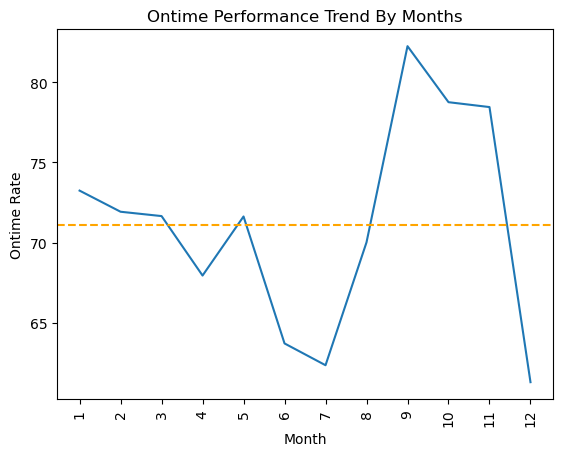

In [21]:
#Draw a line chart to visualize the monthly trend

#chart size
plt.figure(figsize=(5, 3))

#chart configuration
ontime_agg_df.plot(kind='line', x='month', y=['dep_ontime_rate'], legend=False)

#Average line configuration
plt.axhline(y=average_rate, color='orange', linestyle='--', label=f'Average Rate ({average_rate:.2f})')

#X-axis set up
plt.xticks(ticks=range(1, len(ontime_agg_df['month']) + 1), labels=ontime_agg_df['month'], rotation=90)

#Title
plt.title('Ontime Performance Trend By Months')

#X-axis label
plt.xlabel('Month')

#Y-axis label
plt.ylabel('Ontime Rate')

plt.show()

The average monthly on-time performance is approximately 71%, meaning that around 7 out of 10 flights depart on time. September has the highest on-time rate at nearly 85%, followed by October and November, each with rates close to 80%.
In contrast, flights are more likely to be delayed in December, June, and July, with on-time rates falling below 65% during these months

### Question 2. What is the on-time performance trend by the days of month?

In [22]:
#Calculate ontime rate by day of the month
ontime_agg_day_df = data_aggregation(flight_clean, 'day', 'month')

#Preview the data
ontime_agg_day_df.head()

,day,month,all_flight,departure_ontime,dep_ontime_rate
0,1,1,831,553,66.546330
1,1,2,908,662,72.907489
2,1,3,944,701,74.258475
3,1,4,959,637,66.423358
4,1,5,962,812,84.407484


<Figure size 2000x1000 with 0 Axes>

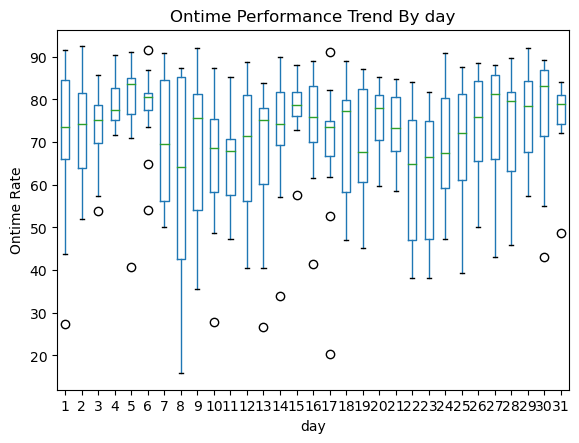

In [23]:
#Draw a boxplot to view distribution of data
boxplot_visualization(ontime_agg_day_df, 'day')

Which days of the month offer the best chances for on-time flights? The data suggests that the 5th, 6th, 15th, 30th, and 31st tend to have good on-time performance, with average rates around 80% and less variation compared to other days of the month.

### Question 3:  What is the on-time performance trend by the day of the week?

In [25]:
#Calculate ontime rate by day of week
ontime_agg_day_df = data_aggregation(flight_clean, 'day_of_week', 'month')

#Preview data
ontime_agg_day_df.head()

,day_of_week,month,all_flight,departure_ontime,dep_ontime_rate
0,Friday,1,3614,2718,75.207526
1,Friday,2,3246,2210,68.083795
2,Friday,3,4654,3102,66.652342
3,Friday,4,3743,1956,52.257547
4,Friday,5,4819,3308,68.644947


<Figure size 2000x1000 with 0 Axes>

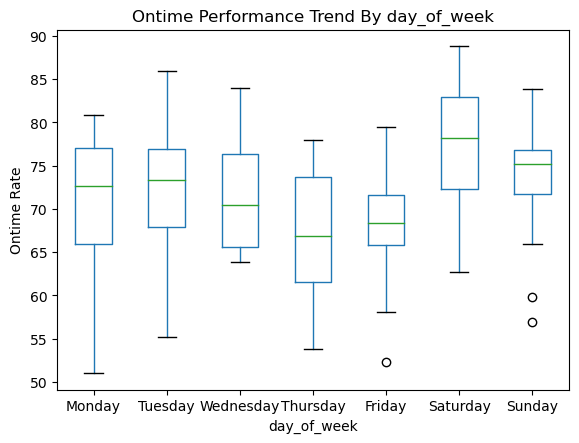

In [27]:
#Draw a boxplot to view the distribution of the data. Order by day in the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
boxplot_visualization(ontime_agg_day_df, 'day_of_week', days_order)

Saturday leads with the highest on-time percentage, averaging nearly 80%, while Thursday has the most delays, with an average on-time rate slightly above 65%.

### Question 4: What is the on-time performance trend by the hour of the day?

In [28]:
#Calculate ontime rate by hour of the day
ontime_agg_hour_df = data_aggregation(flight_clean, 'flight_date', 'hour')

#Preview the data
ontime_agg_hour_df.head()

,flight_date,hour,all_flight,departure_ontime,dep_ontime_rate
0,2013-01-01,5,6,4,66.666667
1,2013-01-01,6,51,41,80.392157
2,2013-01-01,7,49,39,79.591837
3,2013-01-01,8,58,45,77.586207
4,2013-01-01,9,56,40,71.428571


<Figure size 2000x1000 with 0 Axes>

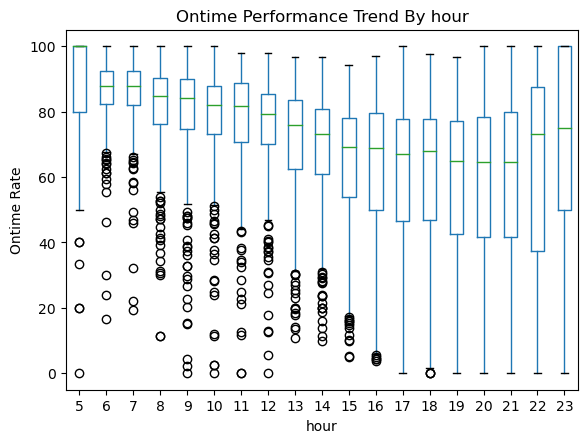

In [29]:
#Draw a boxplot to view the distribution of the data.
boxplot_visualization(ontime_agg_hour_df, 'hour')

When it comes to time of day, flights in the morning generally perform better than those in the afternoon.

### Conclusion

In conclusion, the data reveals clear trends to help you make more informed decisions when booking flights. September emerges as the best month for on-time departures, with Saturday being the most reliable day of the week. For those who prefer to avoid delays, booking flights on the 5th, 6th, 15th, 30th, or 31st of the month and opting for morning departures can significantly improve your chances of an on-time flight.